In [118]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/cpu:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17088638296036592659
, name: "/gpu:0"
device_type: "GPU"
memory_limit: 85131264
locality {
  bus_id: 1
}
incarnation: 15322007056860028816
physical_device_desc: "device: 0, name: GeForce GTX 750 Ti, pci bus id: 0000:02:00.0"
]


In [1]:
from IPython.display import Image
def show(id, w=6):
    return Image('../pics/class3/{}.jpg'.format(id), width=w*100)

In [2]:
!ls Recurrent_Neural_Networks/

Google_Stock_Price_Test.csv   rnn.py		 rnn_homework_solution.py
Google_Stock_Price_Train.csv  rnn_evaluation.py


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset_train = pd.read_csv('Recurrent_Neural_Networks/Google_Stock_Price_Train.csv')
print dataset_train.shape
dataset_train.head()

(1258, 6)


,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [5]:
training_set = dataset_train.iloc[:,1:2].values
print training_set.shape, type(training_set)
training_set

(1258, 1) <type 'numpy.ndarray'>


array([[ 325.25],
       [ 331.27],
       [ 329.83],
       ..., 
       [ 793.7 ],
       [ 783.33],
       [ 782.75]])

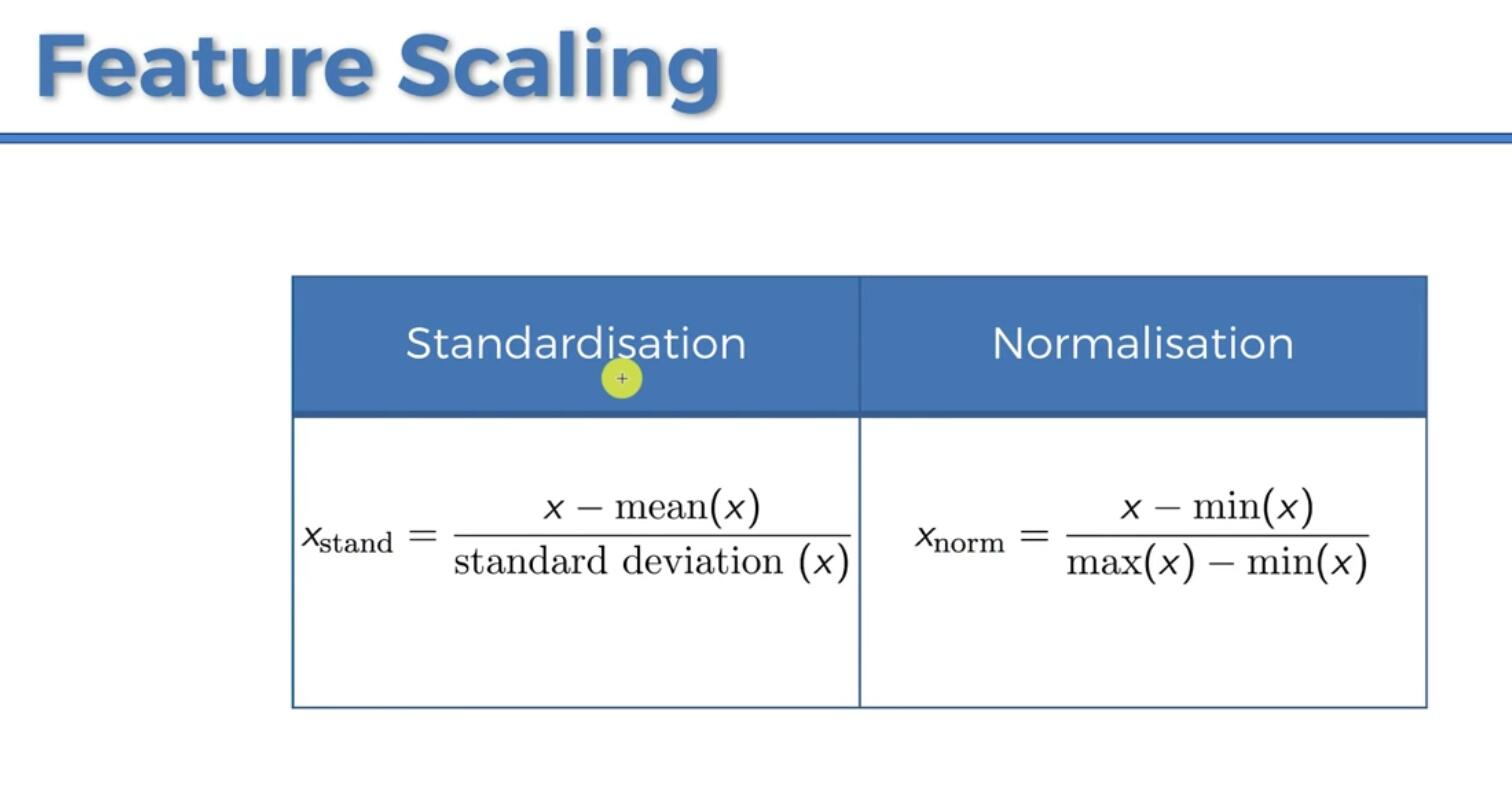

In [6]:
show(101)

https://stackoverflow.com/questions/39120942/difference-between-standardscaler-and-normalizer-in-sklearn-preprocessing

https://www.google.com/search?ei=50X1Wf6_HoG9mQHHrKXADA&q=l1+l2+machine+learning&oq=l1+l2+machine&gs_l=psy-ab.3.0.0.16718.18189.0.19036.7.7.0.0.0.0.107.595.3j3.6.0....0...1.1.64.psy-ab..1.6.595...0i22i30k1.0.j7cTYmivLDU

In [7]:
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler
# MinMaxScaler?

In [8]:
sc = MinMaxScaler()
sc

MinMaxScaler(copy=True, feature_range=(0, 1))

In [9]:
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[ 0.08581368],
       [ 0.09701243],
       [ 0.09433366],
       ..., 
       [ 0.95725128],
       [ 0.93796041],
       [ 0.93688146]])

In [10]:
training_set_scaled.shape

(1258, 1)

In [11]:
# creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, training_set_scaled.shape[0]):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
print len(X_train), len(y_train)
X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape, y_train.shape

1198 1198


((1198, 60), (1198,))

In [12]:
pd.DataFrame(X_train).tail()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
1193,0.934445,0.924939,0.921069,0.924381,0.930482,0.929905,0.931133,0.927506,0.944155,0.938760,...,0.931766,0.941141,0.957623,0.964134,0.964023,0.969715,0.950778,0.962944,0.961232,0.954759
1194,0.924939,0.921069,0.924381,0.930482,0.929905,0.931133,0.927506,0.944155,0.938760,0.934035,...,0.941141,0.957623,0.964134,0.964023,0.969715,0.950778,0.962944,0.961232,0.954759,0.952043
1195,0.921069,0.924381,0.930482,0.929905,0.931133,0.927506,0.944155,0.938760,0.934035,0.934835,...,0.957623,0.964134,0.964023,0.969715,0.950778,0.962944,0.961232,0.954759,0.952043,0.951633
1196,0.924381,0.930482,0.929905,0.931133,0.927506,0.944155,0.938760,0.934035,0.934835,0.931394,...,0.964134,0.964023,0.969715,0.950778,0.962944,0.961232,0.954759,0.952043,0.951633,0.957251
1197,0.930482,0.929905,0.931133,0.927506,0.944155,0.938760,0.934035,0.934835,0.931394,0.946369,...,0.964023,0.969715,0.950778,0.962944,0.961232,0.954759,0.952043,0.951633,0.957251,0.937960


https://keras.io/layers/recurrent/

In [14]:
# reshaping
# np.reshape?
print np.reshape(X_train, (1198,60,1)).shape
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

(1198, 60, 1)


In [15]:
# build RNN
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

? return sequences

In [28]:
# initializing
regressor = Sequential()
# first LSTM layer
regressor.add(LSTM(units= 50, return_sequences= True, input_shape = (X_train.shape[1], 1)))
# add dropout
regressor.add(Dropout(0.2))
# second LSTM layer
regressor.add(LSTM(units= 50, return_sequences= True))
regressor.add(Dropout(0.2))
# third LSTM layer
regressor.add(LSTM(units= 50, return_sequences= True))
regressor.add(Dropout(0.2))
# fourth LSTM layer
# regressor.add(LSTM(units= 50, return_sequences= False))
regressor.add(LSTM(units= 50))
regressor.add(Dropout(0.2))
# output layer
regressor.add(Dense(units=1))

# compiling
regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 60, 50)            10400     
_________________________________________________________________
dropout_23 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_25 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_24 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_26 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_25 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_27 (LSTM)               (None, 50)                20200     
__________

In [32]:
print X_train.shape, y_train.shape
regressor.fit(X_train, y_train, epochs= 100, batch_size= 32)

(1198, 60, 1) (1198,)
Epoch 1/100
1198/1198 [==============================] - 10s - loss: 0.0067    
Epoch 2/100
1198/1198 [==============================] - 10s - loss: 0.0050    
Epoch 3/100
1198/1198 [==============================] - 10s - loss: 0.0049    
Epoch 4/100
1198/1198 [==============================] - 10s - loss: 0.0047    
Epoch 5/100
1198/1198 [==============================] - 10s - loss: 0.0044    
Epoch 6/100
1198/1198 [==============================] - 10s - loss: 0.0044    
Epoch 7/100
1198/1198 [==============================] - 10s - loss: 0.0044    
Epoch 8/100
1198/1198 [==============================] - 10s - loss: 0.0038    
Epoch 9/100
1198/1198 [==============================] - 10s - loss: 0.0043    
Epoch 10/100
1198/1198 [==============================] - 10s - loss: 0.0041    
Epoch 11/100
1198/1198 [==============================] - 10s - loss: 0.0042    
Epoch 12/100
1198/1198 [==============================] - 10s - loss: 0.0038    
Epoch 13/100
11

In [33]:
# CPU is slower
# print X_train.shape, y_train.shape
# regressor.fit(X_train, y_train, epochs= 100, batch_size= 32)

In [37]:
regressor.save('RNN_stock.h5')

In [39]:
!ls -hl

total 4.9M
drwxr-xr-x 2 root    root    4.0K Apr  9  2017 Homework_Challenge
-rw-r--r-- 1 soyoung soyoung 4.0M Oct 28 21:39 RNN_0.ipynb
-rw-r--r-- 1 soyoung soyoung  98K Oct 30 01:22 RNN_2.ipynb
-rw-r--r-- 1 soyoung soyoung 879K Oct 30 01:30 RNN_stock.h5
drwxr-xr-x 2 root    root    4.0K Apr  6  2017 Recurrent_Neural_Networks
drwxrwxr-x 4 root    root    4.0K Oct 27 17:57 __MACOSX


In [121]:
from keras.models import load_model

In [188]:
# predict
dataset_test = pd.read_csv('Recurrent_Neural_Networks/Google_Stock_Price_Test.csv')
real_stopck_price= dataset_test.iloc[:,1:2].values
real_stopck_price.shape

(20, 1)

In [189]:
real_stopck_price[:3]

array([[ 778.81],
       [ 788.36],
       [ 786.08]])

In [126]:
loads = load_model('./RNN_stock.h5')
loads

In [220]:
dataset_train = pd.read_csv('Recurrent_Neural_Networks/Google_Stock_Price_Train.csv')
print dataset_train.shape
dataset_train.head()

(1258, 6)


,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [225]:
train_open_last=dataset_train['Open'].values
train_open_last.shape

(1258,)

In [226]:
train_open_last[-80:]==train_open_last[1258-20-60:]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

In [227]:
train_open_last = train_open_last[-80:].reshape(-1,1)
train_open_last.shape

(80, 1)

In [228]:
train_open_last.shape

(80, 1)

In [229]:
train_open_last[:3]

array([[ 778.59],
       [ 770.1 ],
       [ 755.13]])

In [230]:
train_open_last = sc.transform(train_open_last)


In [239]:
train_open_last[79]

array([ 0.93688146])

In [231]:
Y_test = []
for i in range(60, 80):
    Y_test.append(train_open_last[i-60:i,0])
Y_test = np.array(Y_test)
Y_test.shape

(20, 60)

In [232]:
Y_test

array([[ 0.92914279,  0.91334921,  0.88550115, ...,  0.91600938,
         0.9132934 ,  0.88979835],
       [ 0.91334921,  0.88550115,  0.90289456, ...,  0.9132934 ,
         0.88979835,  0.86589404],
       [ 0.88550115,  0.90289456,  0.89383511, ...,  0.88979835,
         0.86589404,  0.89030062],
       ..., 
       [ 0.92106928,  0.92438053,  0.93048218, ...,  0.95475854,
         0.95204256,  0.95163331],
       [ 0.92438053,  0.93048218,  0.9299055 , ...,  0.95204256,
         0.95163331,  0.95725128],
       [ 0.93048218,  0.9299055 ,  0.93113327, ...,  0.95163331,
         0.95725128,  0.93796041]])

In [233]:
Y_test=Y_test.reshape(20,60,1)
Y_test.shape

(20, 60, 1)

In [234]:
pred = loads.predict(Y_test)
pred.shape

(20, 1)

In [235]:
pred[:3]

array([[ 0.91120291],
       [ 0.89821088],
       [ 0.88862884]], dtype=float32)

In [236]:
pred = sc.inverse_transform(pred)
pred[:3]

array([[ 768.94622803],
       [ 761.96221924],
       [ 756.8112793 ]], dtype=float32)

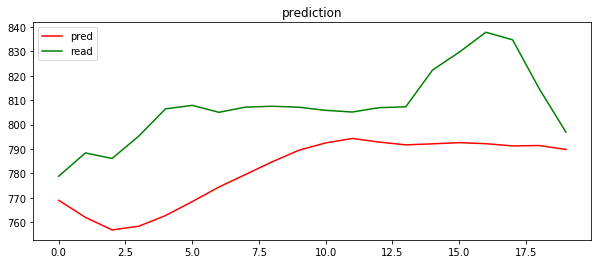

In [256]:
plt.figure(figsize=(10,4))
plt.plot(pred, c='r', label='pred')
plt.plot(real_stopck_price, c='g', label='read')
plt.legend(loc=2)
plt.title('prediction')
plt.show()

In [251]:
plt.legend?